# Project Name : Spaceship Titanic

The **Spaceship Titanic** was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

<p>
    While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!
    </p>

## Problem Statement
Predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## Steps

1. Firstly,  we will be importing the essential python libraries. 

In [1]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

2. Next, we will read the contents of training data provided and load it into python. And seperate the target. <br/>
   Here, the outcome we require is the list of passengers who were transported by Anomaly. <br/>

  

In [2]:
# Load the data, and separate the target
space_file_path = '../input/spaceship-titanic/train.csv'
space_data = pd.read_csv(space_file_path)
print(space_data)
y = space_data.Transported


     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

Before going further, let's look at the expected output of the prediction
<br/>Hence, the final result should be a table containing **PassengerId** and **Transported** columns

In [3]:
sample_data = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")
sample_data.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


3. Creating X with the features that needs to taken consideration for the machine learning model.

In [4]:
# Selecting features for X
features = ['Age','Spa','ShoppingMall','FoodCourt','RoomService','VRDeck']


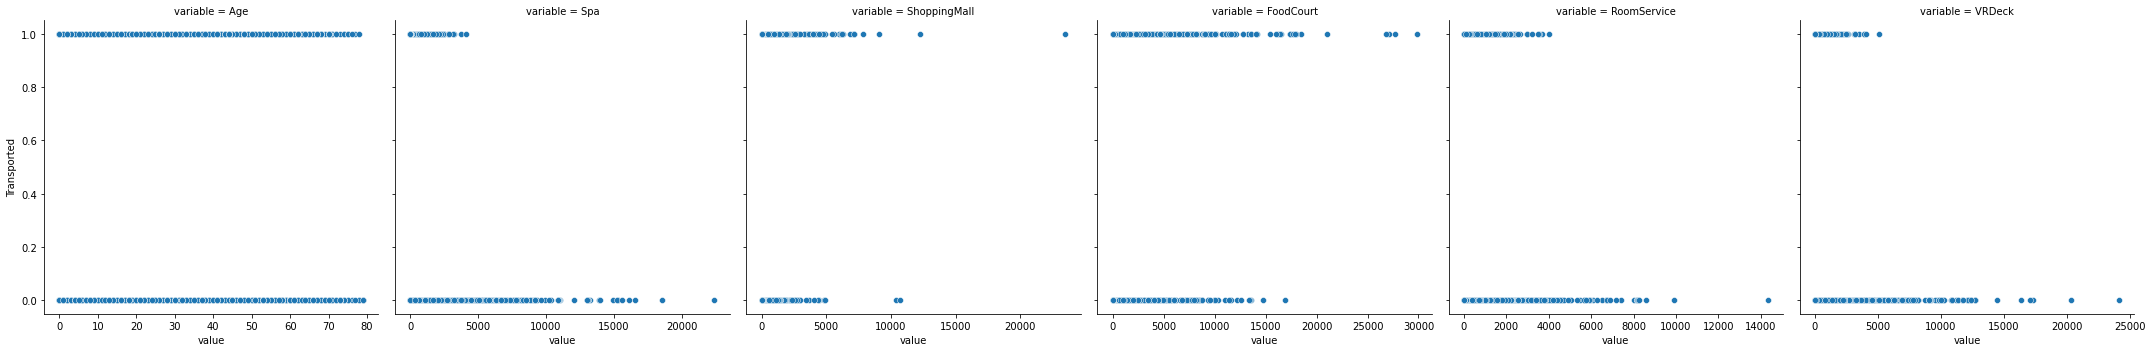

In [5]:
 sns.relplot(
    x="value", y="Transported", col="variable", data=space_data.melt(id_vars="Transported", value_vars=features), facet_kws=dict(sharex=False),
);

4. Once the features are identified, we will be creating X based on the features. And fill any empty data cells in the input data.

In [6]:
# Creating X based on features
X = space_data[features]
X=X.fillna(0)

5. Next, we will load the testing data 

In [7]:
#Loading the test data
test_data = pd.read_csv("../input/spaceship-titanic/test.csv")
test_data.head()
test_X = test_data[features]
test_X=test_X.fillna(0)
test_X.head()


,Age,Spa,ShoppingMall,FoodCourt,RoomService,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,2823.0,0.0,9.0,0.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,181.0,0.0,6652.0,0.0,585.0
4,20.0,0.0,635.0,0.0,10.0,0.0


In [8]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


6. Though the best practises is to use the best and efficient machine learning model by using any validation techniques, here we will be using **Random Forest Regressor** model for acheiving the result.
    
 # Random Forest Regressor Model
 > Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. 
 > Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.
 
The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. 
It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.

<br> The steps for defining a random forest model are:
 - initialize the model into an object
 - fit the model with training data
 - predict the model with `model.predict()` function

In [9]:
# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X, y)

RandomForestRegressor(random_state=1)

In [10]:
#Predicting the output
rf_val_predictions = rf_model.predict(test_X)
Transportedvalues=[]
rf_val_predictions

array([0.86346201, 0.02      , 0.74364806, ..., 0.79279647, 0.62      ,
       0.81365664])

Since the model produced numerical values, we will be creating predictions based on the numerical data which we have created.

In [11]:
for value in rf_val_predictions:
    if value>.5:
        Transportedvalues.append(True)
    else :
        Transportedvalues.append(False)

In [12]:
print(rf_val_predictions)
print(Transportedvalues)

[0.86346201 0.02       0.74364806 ... 0.79279647 0.62       0.81365664]
[True, False, True, True, False, True, True, True, True, True, False, False, True, True, False, False, False, True, True, False, True, False, True, True, False, False, True, True, True, True, True, False, True, False, False, False, True, True, True, False, True, False, True, True, False, True, False, False, True, False, True, True, False, True, True, True, False, True, True, False, True, False, False, True, True, False, True, False, True, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, True, True, False, True, True, False, False, False, False, False, False, True, False, True, True, True, True, True, False, True, False, True, True, False, True, True, False, True, True, False, True, True, False, False, False, False, False, False, False, True, True, False, False, True, False, True, True, True, True, False, True, True, False, False, False, True, True, True, False,

Once the result is obtained from model, we will be creating a dataFrame to store the result in the indended format.
<br/> After that we will be converting dataframe to csv as well.

In [13]:
#Printing the output
output = pd.DataFrame({'PassengerId': test_data.PassengerId , 'Transported': Transportedvalues})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully completed!")

Your submission was successfully completed!


Hence a machine learning model was created for predicting which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
<br /> The accuracy of the model can be furthur increased by the following:
- Adding or removing the features used 
- Using another machine learning model instead of Random Forest Regressor